# Panel size comparison

## This script is to compare the UAV dataset solar panel size and the Connenicut satellite data solar panel pixel size 

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import skimage
from skimage import io


In [32]:

def get_height_from_name(name):
    """
    Get the height of the photo from the name of the image in format of "DJI_0053_height_21m.jpg"
    """
    if not name.startswith('DJI'):
        # This is not a DJI photo, naming convention does not meet
        print("In height acquiring for photo", name, " this is not a DJI photo, assiging height +999")
        return 999
    after_height_before_dot = name.split('_')[-1].split('.')[0]
    assert after_height_before_dot[-1] == 'm', "In height acquiring for photo, you format is incorrect with not ending with meter"
    return int(eval(after_height_before_dot[:-1]))
    

In [60]:
# Some helping functions
def get_label_list_from_dir(data_dir, height_lower_limit=0, height_higher_limit=9999):
    """
    The function to get the list of label files from a directory, if that is lower than certain height, ignore that
    :param: data_dir: The directory where the photos are stored
    :param: height_lower_limit: The lower limit of the height
    :param: height_higher_limit: The upper limit of the height
    """
    label_list = []
    # Loop through files and get only .png files (which are the labels)
    for file in os.listdir(data_dir):
        if not file.endswith('.png'):
            continue;
        height = get_height_from_name(file)
        # Compare the height with limit, lower -> ignore
        if height < height_lower_limit or height > height_higher_limit:
            continue;
        label_list.append(os.path.join(data_dir, file))
    return label_list


def get_size_list_from_label_list(label_list):
    """
    The function that get a list of lists that contains the pixel number of the solar panels for each img in the label_list
    """
    big_size_list = []
    for file in label_list:
        # Read the image
        img = io.imread(file)
        # Get only 1 channel
        if len(np.shape(img)) == 3:
            img = img[:,:,0]
        # Connect the components
        labels, num = skimage.measure.label(img, return_num=True)
        # Get the size and append that into list
        size_list = []
        for i in range(num):
            size_list.append(np.sum(labels==i+1))   # starting from 1, since 0 is the background
        big_size_list.append(size_list)
    return big_size_list
def get_full_list_from_list_of_list(list_of_list):
    """
    as titled, get one full list from a list of list of numbers
    """
    full_list = []
    for list in list_of_list:
        for num in list:
            full_list.append(num)
    return np.array(full_list)

In [61]:
### Step 1: Read the list of files from UAV photos
UAV_data_dir = '/scratch/sr365/Catalyst_data/2021_02_17_10_B_90/'
UAV_label_list = get_label_list_from_dir(UAV_data_dir, height_lower_limit=30, height_higher_limit=120)
UAV_size_list = get_size_list_from_label_list(UAV_label_list)
UAV_full_list = get_full_list_from_list_of_list(UAV_size_list)
### Step 2: Read the list of files from satellite photos
SAT_data_dir = '/scratch/wh145/data/ct_finetune/annotations'
SAT_label_list = get_label_list_from_dir(SAT_data_dir)
SAT_size_list = get_size_list_from_label_list(SAT_label_list)
SAT_full_list = get_full_list_from_list_of_list(SAT_size_list)

In height acquiring for photo 205770_ne.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 885630_sw.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 050885_ne.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 015840_se.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 075865_se.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 035830_sw.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 005815_ne.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 005865_sw.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 075860_sw.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 875635_ne.png  this is not a DJI photo, assiging height +999
In height acquiring for photo 905670_sw.png  this is not a DJI photo, assiging height +999

In [62]:
def plot_UAV_SAT_panel_size(UAV_size_list, SAT_size_list,save_dir=None):
    """
    Plot the histogram comparison between UAV solar panel size and Satellite solar panel size and (if provided dir) save it
    """
    f = plt.figure()
    plt.hist(np.array(UAV_size_list),label='UAV_panel_size',alpha=0.5,color='r')
    plt.hist(np.array(SAT_size_list),label='SAT_panel_size',alpha=0.5,color='b')
    plt.xlabel('#pixels per object')
    plt.ylabel('frequency')
    plt.legend()
    plt.title('Comparison of UAV and SAT panel size')
    if save_dir:
        plt.save_fig(os.path.join(save_dir, 'UAV_SAT_panel_size_comparison.png'))

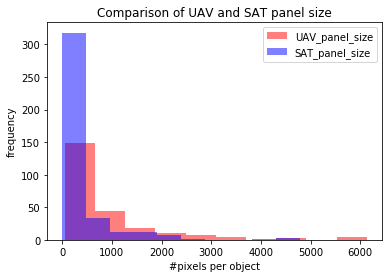

In [63]:
### Step 3: Plot the histogram difference
plot_UAV_SAT_panel_size(UAV_full_list, SAT_full_list)

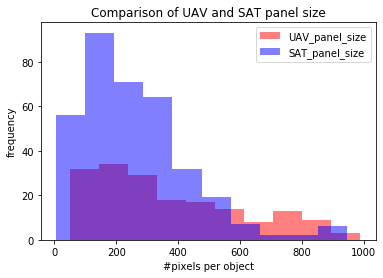

In [64]:
### Step 3.5: Plot the histogram difference for smaller panels
small_panel_limit = 1000        # Define the lower limit of small panel
UAV_small_list = UAV_full_list[UAV_full_list < small_panel_limit]
SAT_small_list = SAT_full_list[SAT_full_list < small_panel_limit]
plot_UAV_SAT_panel_size(UAV_small_list, SAT_small_list)
